 # Decision Tree
 
- Graphniz
 http://www.graphviz.org
 
 - https://graphviz.gitlab.io/_pages/Download/Download_windows.html
 
 - path 설정해주기 C:\Program Files (x86)\Graphviz2.38\bin
 - pip install graphviz
 
 

In [3]:

import operator
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc('font',family = font_name)

from sklearn.model_selection import train_test_split
import mglearn

In [2]:
import os 
os.environ["PATH"] += os.pathsep + "C:\\Program Files (x86)\\Graphviz2.38\\bin"

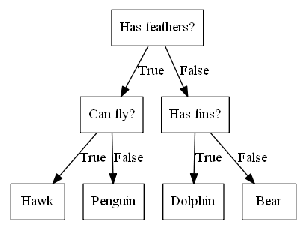

In [3]:
mglearn.plots.plot_animal_tree()

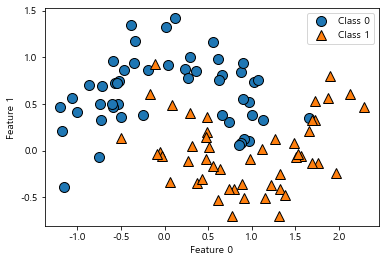

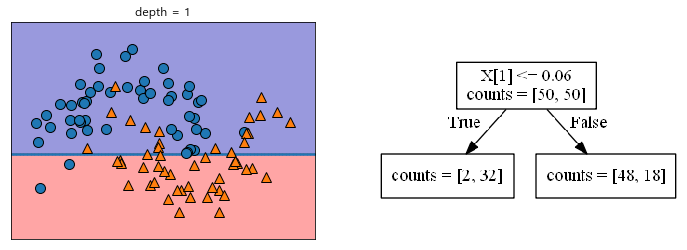

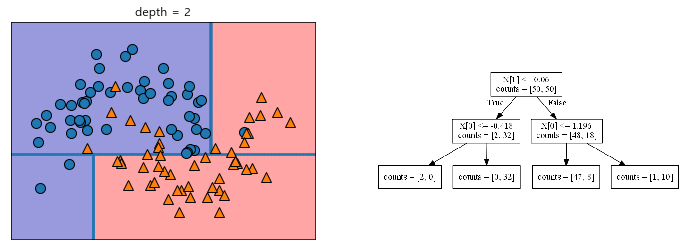

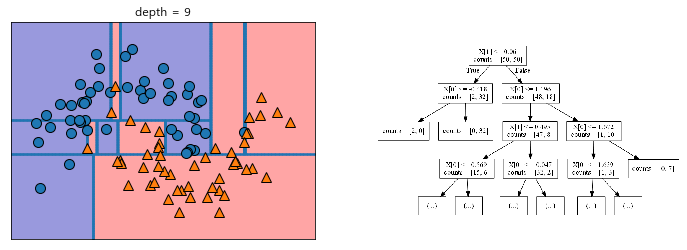

In [4]:
mglearn.plots.plot_tree_progressive()

In [1]:
from sklearn.tree import DecisionTreeClassifier

In [2]:
dt_clf = DecisionTreeClassifier(random_state = 156)

from sklearn.datasets import load_iris
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 11)

dt_clf.fit(X_train, y_train)

NameError: name 'train_test_split' is not defined

In [17]:
from sklearn.tree import export_graphviz
import graphviz

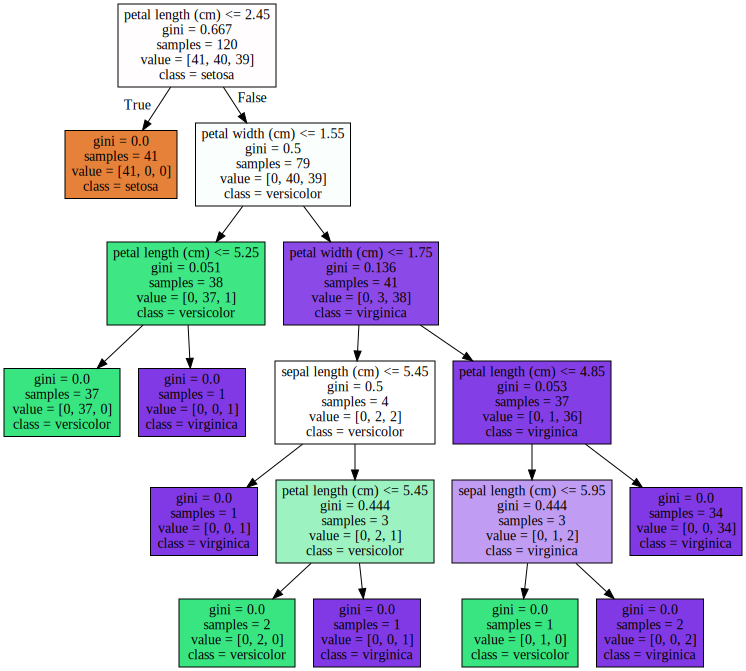

In [18]:
export_graphviz(dt_clf, out_file= "data/tree.dot", class_names=iris.target_names,
               feature_names = iris.feature_names,impurity = True, filled = True)
f = open("data/tree.dot")
dot_graph = f.read()
display(graphviz.Source(dot_graph))
f.close()

In [13]:
f = open("data/tree.dot")
dot_graph = f.read()
display(graphviz.Source(dot_graph))
f.close()

NameError: name 'graphviz' is not defined

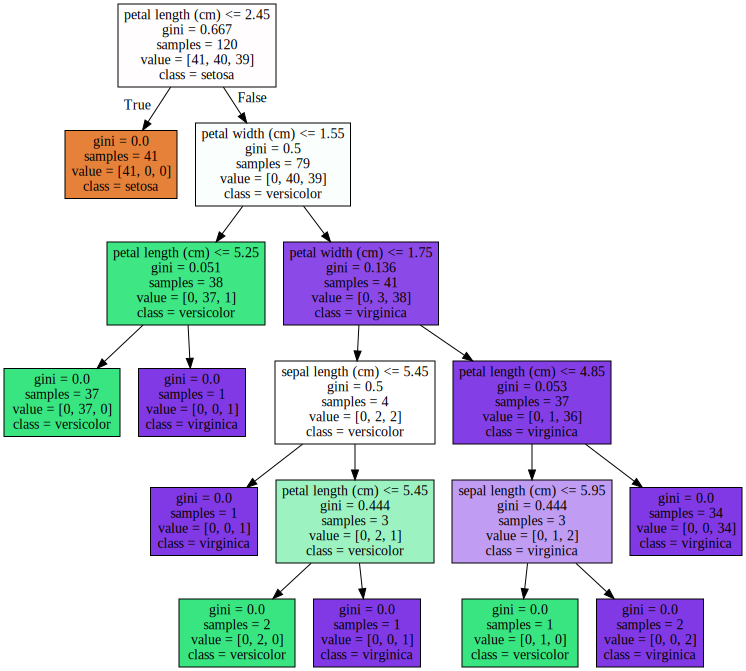

In [19]:
with open("data/tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# ID3 - entropy, In~ gain
# Gini(계수) 
- 0~1 0에 가까운거면 평등 1에 가까우면 불평등 
- 0은 같은것끼리 


https://www.youtube.com/watch?v=-W0DnxQK1Eo

lease find the mentioned links below:

Caury Schafer YouTube channel - https://www.youtube.com/user/schafer5

W3Schools  : https://www.w3schools.com/

Khan academy : https://www.khanacademy.org/

Math is fun : https://www.mathsisfun.com/

MIT calculus : https://www.youtube.com/watch?v=7K1sB...

Beginning data science(step 0) : https://www.youtube.com/watch?v=9BsKb...

# 복사도 제어 : Prunning
    - 사진가져오기
    - 사후 가지치기
    - sklearn에서는사후 가지치기만 지원
    - 매개변수
    max_depth
    max_lear_nodes : 말단 노두의 최대개수
    min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 갯수
    min_samples_split : 노드가 분기할 수 있는 최소 샘플 갯수
    max_features: 최적의 분할을 위해 고려할 피처 개수 10
    


In [66]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify = cancer.target , random_state = 42)

tree = DecisionTreeClassifier(random_state = 0, max_depth=4).fit(X_train, y_train)
tree


print("train : ", tree.score(X_train,y_train))
print("test : ", tree.score(X_test, y_test))

train :  0.9882629107981221
test :  0.951048951048951


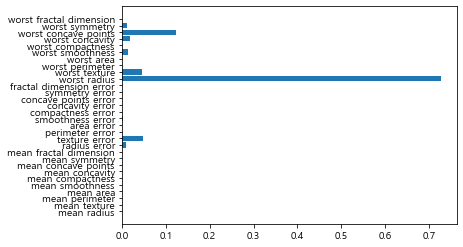

In [69]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    
plot_feature_importances_cancer(tree)

In [22]:
export_graphviz(dt_clf, out_file= "data/tree.dot", class_names=["0","1"],
               feature_names = cancer.feature_names,impurity = True, filled = True)
f = open("data/tree.dot")
dot_graph = f.read()
display(graphviz.Source(dot_graph))
f.close()

ValueError: Length of feature_names, 30 does not match number of features, 4

# 사례1 : iris

In [4]:
dt_clf = DecisionTreeClassifier(random_state = 156)

from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['result'] = iris.target
df.head()

X = iris.data[:, [2, 3]]
y = iris.target



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

dt_clf = DecisionTreeClassifier(random_state = 0, max_depth = 3).fit(X_train, y_train)
print('train : ', dt_clf.score(X_train, y_train))
print('test : ', dt_clf.score(X_test, y_test))

train :  0.9821428571428571
test :  0.9736842105263158


# 사례2 : 서울지역 동 분류


In [26]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

In [27]:
train_df = pd.DataFrame(district_dict_list)
train_df

,district,latitude,longitude,label
0,Gangseo-gu,37.551000,126.849500,Gangseo
1,Yangcheon-gu,37.524240,126.855396,Gangseo
2,Guro-gu,37.495400,126.887400,Gangseo
3,Geumcheon-gu,37.451900,126.902000,Gangseo
4,Mapo-gu,37.560229,126.908728,Gangseo
5,Gwanak-gu,37.487517,126.915065,Gangnam
6,Dongjak-gu,37.512400,126.939300,Gangnam
7,Seocho-gu,37.483700,127.032400,Gangnam
8,Gangnam-gu,37.517200,127.047300,Gangnam
9,Songpa-gu,37.503510,127.117898,Gangnam


In [29]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

In [30]:
test_df = pd.DataFrame(dong_dict_list)
test_df

,dong,latitude,longitude,label
0,Gaebong-dong,37.489853,126.854547,Gangseo
1,Gochuk-dong,37.501394,126.859245,Gangseo
2,Hwagok-dong,37.537759,126.847951,Gangseo
3,Banghwa-dong,37.575817,126.815719,Gangseo
4,Sangam-dong,37.577039,126.891620,Gangseo
5,Nonhyun-dong,37.508838,127.030720,Gangnam
6,Daechi-dong,37.501163,127.057193,Gangnam
7,Seocho-dong,37.486401,127.018281,Gangnam
8,Bangbae-dong,37.483279,126.988194,Gangnam
9,Dogok-dong,37.492896,127.043159,Gangnam


In [31]:
train_df.label.value_counts()
test_df.label.value_counts()

Gangseo     5
Gangdong    5
Gangnam     5
Gangbuk     5
Name: label, dtype: int64

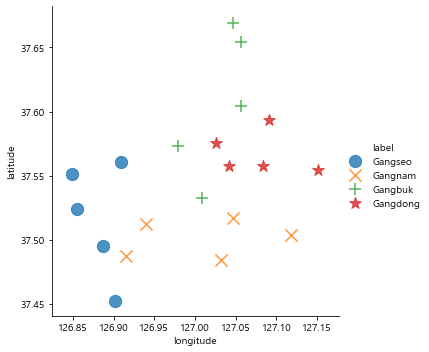

In [36]:
sns.lmplot("longitude","latitude",data=train_df, fit_reg=False, hue = "label",markers=["o","x","+","*"],
          scatter_kws = {"s":150})

In [37]:
train_df.drop(["district"],axis=1,inplace = True)
test_df.drop(["dong"],axis=1,inplace = True)

In [39]:
test_df

,latitude,longitude,label
0,37.489853,126.854547,Gangseo
1,37.501394,126.859245,Gangseo
2,37.537759,126.847951,Gangseo
3,37.575817,126.815719,Gangseo
4,37.577039,126.891620,Gangseo
5,37.508838,127.030720,Gangnam
6,37.501163,127.057193,Gangnam
7,37.486401,127.018281,Gangnam
8,37.483279,126.988194,Gangnam
9,37.492896,127.043159,Gangnam


In [41]:
X_train = train_df[['longitude', 'latitude']]
y_train = train_df[['label']]

X_test = test_df[['longitude', 'latitude']]
y_test = test_df[['label']]

In [43]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y_encode=le.fit_transform(y_train)
y_encode

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [47]:
clf = DecisionTreeClassifier(random_state = 35, max_depth = 3).fit(X_train,y_encode)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=35, splitter='best')

# P.237

In [48]:
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test)
print(accuracy_score(y_test.values, le.classes_[pred]))

1.0


## Random Forest 

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [59]:
X, y =  make_moons(n_samples = 100,noise = 0.25, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,
                                                   stratify = y) 

In [60]:
forest = RandomForestClassifier(random_state = 2, n_estimators = 5).fit(X_train,y_train)
forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

AttributeError: 'AxesSubplot' object has no attribute 'set_tittle'

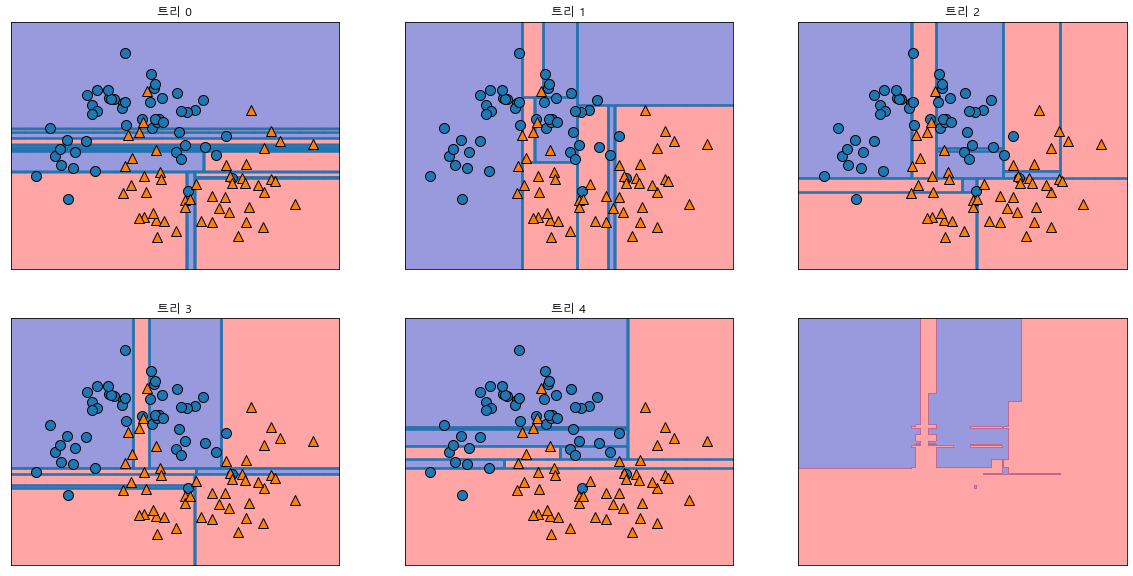

In [62]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
# axes[-1,-1].set_tittle("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [71]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

forest = RandomForestClassifier(random_state = 0, n_estimators = 100).fit(X_train, y_train)

print('train : ', forest.score(X_train, y_train))
print('test : ', forest.score(X_test, y_test))

train :  1.0
test :  0.958041958041958


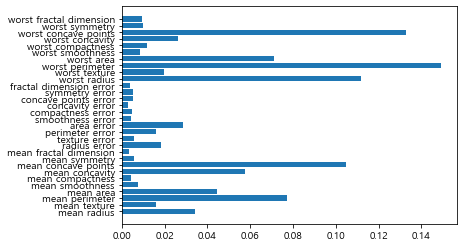

In [72]:
plot_feature_importances_cancer(forest)

### 사례 3 : 손글씨 이미지

x_data: 이미지, 64 개 특성 (8x8), 0~16, 1797 개
y_data: 0~9, 1797 개

In [75]:
from sklearn.datasets import load_digits

mnist = load_digits()
mnist.data.shape
mnist.target

array([0, 1, 2, ..., 8, 9, 8])

In [76]:
features, labels = mnist.data, mnist.target

# pp.324 모델평가와 성능향상(참고)

In [79]:
from sklearn.model_selection import cross_val_score
# 교차 검증
def cross_validation(clf, features, labels):
    cv_scores = []
    
    for i in range(15):
        scores = cross_val_score(clf, features, labels, scoring= "accuracy", cv=10) #cv 
        cv_scores.append(scores.mean())
        
    return cv_scores

In [80]:
df_cv_scores = cross_validation(DecisionTreeClassifier(), features, labels)
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels)

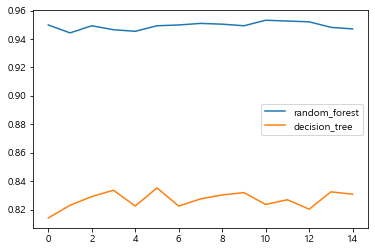

In [86]:
cv_list = [["random_forest", rf_cv_scores], ["decision_tree", df_cv_scores]]
# df = pd.DataFrame.from_items(cv_list)
# df = pd.DataFrame({'random_forest' : rf_cv_scores, 'decision_tree' : df_cv_scores})
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

In [87]:
print(np.mean(df_cv_scores))
print(np.mean(rf_cv_scores))

0.8269157872956755
0.9492791226981171


## 사례 4: 독버섯 데이터
    https://archive.ics.uci.edu/ml/index.php
    https://archive.ics.uci.edu/ml/index.php
    
    - 0번째 열에 p,e로 정답이 나와있음 나머지는 훈련데이터

In [92]:
mr = pd.read_csv("data/mushrooms.csv",header=None)
mr.head()
# mr.shape

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [90]:
mr.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [91]:
mr.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [93]:
X = mr.drop(0, axis = 1) #열기준으로 -0번째열 지워라
y = mr[0] # y에 정답만 들어가야되니깐 


# 숫자로 바꿔주는


In [109]:
from sklearn.preprocessing import LabelEncoder

le_x = LabelEncoder()
for col in X.columns:
    X[col] = le_x.fit_transform(X[col])
    
le_y = LabelEncoder()
y = le_y.fit_transform(y)

In [110]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [111]:
y

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

clf = KNeighborsClassifier().fit(X_train, y_train)
pred = clf.predict(X_test)

print("정답률 : ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

정답률 :  0.9975381585425899
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1024
           1       1.00      1.00      1.00      1007

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [102]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression().fit(X,y)
pred2 = clf2.predict(X_test)

print("정답률 : ", accuracy_score(y_test, pred2))
print(classification_report(y_test, pred2))

정답률 :  0.9507631708517972
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1024
           1       0.95      0.95      0.95      1007

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [104]:
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier().fit(X_train,y_train)
pred3 = clf3.predict(X_test)

print("정답률 : ", accuracy_score(y_test, pred3))
print(classification_report(y_test, pred3))

정답률 :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1024
           1       1.00      1.00      1.00      1007

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [105]:
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier().fit(X_train,y_train)
pred4 = clf4.predict(X_test)

print("정답률 : ", accuracy_score(y_test, pred4))
print(classification_report(y_test, pred4))

정답률 :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1024
           1       1.00      1.00      1.00      1007

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



# 데이터의 규격을 맞추는 
# 표준화(노이즈를 줄인다)

In [117]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,y)
sc = StandardScaler()

X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [107]:
X_train

array([[-0.83817676,  0.1346384 , -0.19476742, ...,  1.43784103,
         0.28379503,  0.28570962],
       [ 1.0341235 ,  0.94847946, -0.58798078, ..., -0.24506064,
         0.28379503, -0.87755715],
       [-0.83817676,  0.94847946, -0.58798078, ..., -1.08651148,
         0.28379503,  1.44897639],
       ...,
       [ 1.0341235 , -1.49304371,  1.378086  , ..., -0.66578606,
        -2.89481367, -0.29592376],
       [-0.83817676, -1.49304371, -0.58798078, ..., -1.08651148,
         1.07844721, -0.87755715],
       [-0.21407667,  0.1346384 , -0.98119413, ...,  1.43784103,
         0.28379503,  1.44897639]])

In [118]:
from sklearn.linear_model import LogisticRegression
clf5 = LogisticRegression().fit(X,y)
pred5 = clf5.predict(X_test)

print("정답률 : ", accuracy_score(y_test, pred5))
print(classification_report(y_test, pred5))

정답률 :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1048
           1       1.00      1.00      1.00       983

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [112]:
X = pd.get_dummies(X, columns = X.columns, drop_first=True)
X

,1_1,1_2,1_3,1_4,1_5,2_1,2_2,2_3,3_1,3_2,...,21_2,21_3,21_4,21_5,22_1,22_2,22_3,22_4,22_5,22_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


# Gradient Boosting Regression

    + 회귀와 분류에서 모두 사용
    + 이전 트리의 오차를 보완하는 방식으로 트리생성(경사하강법)
    + 강력한 사전 가지치기 사용
    + 랜덤 포레스트 보다는 매개변수 설정에 민감하지만 잘 조정하면
    더높은 정확도 제공
    + Learning_rate를 사용하여 오차 보정
    + XG Boost, LightGBM

In [119]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

In [125]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state = 0)

In [121]:
# default 깊이는 3, 트리의 개수는 100개 , learning_rate= 0.1
tree = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.958041958041958


In [122]:
tree = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)
print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  0.9906103286384976
테스트 정확도 :  0.965034965034965


In [126]:
tree = GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train, y_train)
print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  0.9882629107981221
테스트 정확도 :  0.965034965034965
